handle imports

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

read playlist data from pkl file

In [168]:
data = pd.read_pickle("04n1XDy49KKW430PKpARDW.pkl").iloc[::-1] # remove .iloc[::-1] if you don't want to reverse the data set
data.head(5)

,playlistID,TrackName,TrackID,SampleURL,ReleaseYear,Genres,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,duration_ms,Popularity
575,04n1XDy49KKW430PKpARDW,Pray For Me (with Kendrick Lamar),6ZNo7Vi0TE9ul1fhKd4S1M,None,2018-02-02,"[canadian contemporary r&b, canadian pop, pop]",0.734,0.667,-4.996,0.0871,0.09200,0.000021,0.104,0.165,100.578,2,1,211440,0.0
574,04n1XDy49KKW430PKpARDW,Starboy,7MXVkk9YMctZqd1Srtv4MB,https://p.scdn.co/mp3-preview/b94e362a55839c5f...,2016-11-25,"[canadian contemporary r&b, canadian pop, pop]",0.679,0.587,-7.015,0.2760,0.14100,0.000006,0.137,0.486,186.003,7,1,230453,88.0
573,04n1XDy49KKW430PKpARDW,"Colors - Coca-Cola® Anthem, 2018 FIFA World CupTM",7wD6iRghe6SnKHkvHqpnC5,https://p.scdn.co/mp3-preview/ec096aa77b9beaa7...,2018-03-09,"[dance pop, edm, pop, pop rap, post-teen pop]",0.707,0.845,-3.478,0.2010,0.02780,0.000000,0.134,0.507,120.125,8,1,187390,61.0
572,04n1XDy49KKW430PKpARDW,Bloodstream,26AuyrZGzWWiYZPSd3XBIg,https://p.scdn.co/mp3-preview/3be7815e178983ea...,2017-04-07,"[dance pop, edm, electropop, pop, pop dance, t...",0.620,0.627,-5.889,0.0259,0.03170,0.000000,0.172,0.164,90.955,9,1,224280,49.0
571,04n1XDy49KKW430PKpARDW,Magenta Riddim,4BiiDQtijdt0WdtiyIPhnO,None,2018-02-23,"[dance pop, edm, electronic trap, pop, pop dan...",0.604,0.897,-3.678,0.0641,0.00041,0.838000,0.327,0.588,102.053,10,0,194490,0.0


printing track name with genres for display

In [169]:
# def f(x,y):
#     print(x, y)

# [f(x, y) for x, y in zip(data['TrackName'], data['Genres'])]

creating a master set of all the genres across the tracks in the playlist

In [170]:
all_genre = set()
def combine_genre(gens):
    if type(gens) == str: # unknown
        return
    global all_genre
    for gen in gens:
        all_genre.add(gen)

result = [combine_genre(g) for g in data['Genres']]
all_genre = sorted(all_genre) # sorting in alphabetical order

In [171]:
all_genre

['aesthetic rap',
 'alabama rap',
 'alt z',
 'alternative dance',
 'alternative r&b',
 'anime',
 'anime rock',
 'antiviral pop',
 'art pop',
 'art rock',
 'atl hip hop',
 'atl trap',
 'australian dance',
 'australian hip hop',
 'australian indie',
 'australian pop',
 'barbadian pop',
 'baroque pop',
 'bass music',
 'bass trap',
 'basshall',
 'bedroom soul',
 'big beat',
 'big room',
 'breakbeat',
 'brostep',
 'cali rap',
 'canadian contemporary r&b',
 'canadian hip hop',
 'canadian indigenous',
 'canadian indigenous hip hop',
 'canadian pop',
 'candy pop',
 'channel pop',
 'chicago rap',
 'chill beats',
 'chillstep',
 'classic city pop',
 'colombian pop',
 'complextro',
 'conscious hip hop',
 'dance pop',
 'dance-punk',
 'dancefloor dnb',
 'dancehall',
 'danish pop',
 'dark pop',
 'dark trap',
 'deep house',
 'deep tropical house',
 'desi hip hop',
 'desi pop',
 'desi trap',
 'detroit hip hop',
 'dfw rap',
 'dirty south rap',
 'downtempo',
 'drift phonk',
 'drill',
 'dutch edm',
 'dutc

renaming some genres to better process them
ex: hip hop -> hip-hop

In [172]:
def fix_genre_name(genre: str) -> str:
    if "hip hop" in genre:
        genre = genre.replace("hip hop", "hip-hop")
    return genre

for index in range(0, len(all_genre)):
    all_genre[index] = fix_genre_name(all_genre[index])

In [173]:
all_genre

['aesthetic rap',
 'alabama rap',
 'alt z',
 'alternative dance',
 'alternative r&b',
 'anime',
 'anime rock',
 'antiviral pop',
 'art pop',
 'art rock',
 'atl hip-hop',
 'atl trap',
 'australian dance',
 'australian hip-hop',
 'australian indie',
 'australian pop',
 'barbadian pop',
 'baroque pop',
 'bass music',
 'bass trap',
 'basshall',
 'bedroom soul',
 'big beat',
 'big room',
 'breakbeat',
 'brostep',
 'cali rap',
 'canadian contemporary r&b',
 'canadian hip-hop',
 'canadian indigenous',
 'canadian indigenous hip-hop',
 'canadian pop',
 'candy pop',
 'channel pop',
 'chicago rap',
 'chill beats',
 'chillstep',
 'classic city pop',
 'colombian pop',
 'complextro',
 'conscious hip-hop',
 'dance pop',
 'dance-punk',
 'dancefloor dnb',
 'dancehall',
 'danish pop',
 'dark pop',
 'dark trap',
 'deep house',
 'deep tropical house',
 'desi hip-hop',
 'desi pop',
 'desi trap',
 'detroit hip-hop',
 'dfw rap',
 'dirty south rap',
 'downtempo',
 'drift phonk',
 'drill',
 'dutch edm',
 'dutc

finding out common overlapping genres.

example:
indian hip-hop and hip-hop will belong to the overlapping genre of hip-hop.

similarly indian hip-hop and australian hip-hop would belong to the overlapping genre of hip-hop

Logic: 

given string 1 and string 2, we find the common words that exsit in both strings.
then we use the follwing formula:

```similarity factor = (count of common words) / min(count of words in string 1, count of words in string 2)```

example:
Given 2 strings, 'indian hip-hop' and 'japanese old school hip-hop', we find the common words between them. here it would be 'hip-hop'.

now we have the count of common words between both the strings, which is = 1.

now we apply the above formula, which would be :

1 / min(2, 4) = 1 / 2 = 0.5



In [174]:
def calc_sim_factor(first: str, second: str):
    if first == second:
        return -1, set()
    split_first = set(first.split(" "))
    split_second = set(second.split(" "))
    common = split_first.intersection(split_second)
    if len(common) == 0:
        return 0, common
    else:
        sim_factor = len(common) / min(len(split_first), len(split_second))
        return sim_factor, common

defining a minimum similarity threshold

In [175]:
SIMILARITY_THRESHOLD = 0.49

In [176]:
calc_sim_factor("indian hip-hop", "japanese old school hip-hop")

(0.5, {'hip-hop'})

finding out overlapping genres, and saving them to a set, along with their count

In [177]:
common_genres_count = dict()

def check_sim(first: str, second: str):
    sim_factor, common = calc_sim_factor(first, second)
    if sim_factor > SIMILARITY_THRESHOLD :
        if " ".join(common) in common_genres_count.keys():
            common_genres_count[" ".join(common)] += 1
        else:
            common_genres_count[" ".join(common)] = 0

for genre_1 in all_genre:
    for genre_2 in all_genre:
        check_sim(genre_1, genre_2)

# sorting by value
common_genres_count = dict(sorted(common_genres_count.items(), key=lambda item: item[1], reverse=True))

checking out the dominant genres in the playlist

these are sorted by value so they (probably) describe your music taste / preference in order

In [178]:
common_genres_count

{'pop': 2231,
 'hip-hop': 915,
 'rap': 405,
 'indie': 139,
 'house': 99,
 'trap': 89,
 'rock': 41,
 'r&b': 39,
 'japanese': 23,
 'edm': 19,
 'indian': 19,
 'uk': 19,
 'dance': 17,
 'canadian': 13,
 'australian': 11,
 'drill': 11,
 'electropop': 11,
 'russian': 11,
 'vapor': 11,
 'alternative': 9,
 'modern': 9,
 'viral': 9,
 'bass': 5,
 'desi': 5,
 'dutch': 5,
 'indie pop': 5,
 'k-pop': 5,
 'melodic': 5,
 'new': 5,
 'swedish': 5,
 'thai': 5,
 'contemporary': 3,
 'electro': 3,
 'korean': 3,
 'alt': 1,
 'anime': 1,
 'art': 1,
 'atl': 1,
 'soul': 1,
 'big': 1,
 'room': 1,
 'contemporary r&b': 1,
 'hip-hop canadian': 1,
 'indigenous canadian': 1,
 'city pop': 1,
 'dance pop': 1,
 'dark': 1,
 'deep house': 1,
 'house tropical': 1,
 'house electro': 1,
 'electronic': 1,
 'emo': 1,
 'french': 1,
 'hop': 1,
 'hindi': 1,
 'rap pop': 1,
 'israeli': 1,
 'hip-hop old school': 1,
 'group k-pop': 1,
 'modern pop': 1,
 'wave': 1,
 'house progressive': 1,
 'punjabi': 1,
 'reggaeton': 1,
 'sad': 1,
 'la

we now iterate once again over the playlist, so find out if a song at a given position matches a given genre, and then create and index based list of True / False values

In [179]:
genre_mapping = {} # genre: list of True / False
def generate_series(genre: str):
    mapping = []
    def gen_map(genres):
        if (type(genres) == str): #unknown
            return
        value = fix_genre_name(" ".join(genres))
        mapping.append(genre in value)
    
    [gen_map(x) for x in data['Genres']]
    genre_mapping[genre] = mapping

In [180]:
for index in range (0, len(common_genres_count)):
    generate_series(list(common_genres_count.keys())[index])

In [181]:
genre_mapping

{'pop': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  False,
  True,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  False,
  Fa

creating a data frame for easier processing

In [182]:
mapped_genre_data = pd.DataFrame(genre_mapping)

In [183]:
# mapped_genre_data.to_csv("my_data.csv")

In [184]:
mapped_genre_data

,pop,hip-hop,rap,indie,house,trap,rock,r&b,japanese,edm,...,hip-hop old school,group k-pop,modern pop,wave,house progressive,punjabi,reggaeton,sad,latino,viral pop
0,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
544,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


defining a window size for analysis. the greater the window size, the smaller the trends in the graph would be. the smaller the window size, the more detailed the graph would be.

In [185]:
WINDOW_SIZE = 10

setting up methods to calculate the count of true in a given list, and a method to iterate over our data with the provided window size in order to count the trend information

In [186]:
def count_true(data: list) -> int:
    count = 0
    for elem in data:
        if elem:
            count += 1
    return count

def calculate_genre_index_count(genre: str):
    gen_count = []
    gen_index = []
    for i in range(0, len(data), WINDOW_SIZE):
        gen_index.append(i)
        gen_count.append(count_true(mapped_genre_data[genre][i:i + WINDOW_SIZE]))
    return gen_index, gen_count

defining the plot genres to visualize on the graph.

note!: the name must be something from the mapped_genre_data columns

In [187]:
PLOT_GENRES = ["hip-hop", "pop", "k-pop", "japanese"]

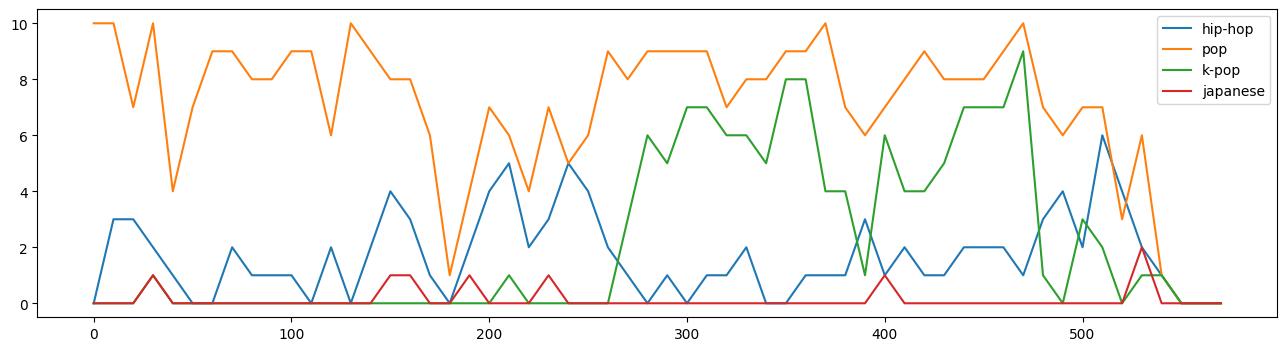

In [188]:
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(4)
  
for gen in PLOT_GENRES:
    pop_index, pop_count = calculate_genre_index_count(gen)
    plt.plot(pop_index, pop_count, label=gen)
plt.legend()
plt.show()